
# Data Preparation

In [23]:
###############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path, index_col = 'customerID')

# Select relevant features and target variable
features = data[['StreamingMovies', 'InternetService']]
target = data['Churn']


In [14]:
# Encode categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)
target_encoded = LabelEncoder().fit_transform(target)

In [15]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

In [16]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network

In [17]:
# Build the neural network model
model = Sequential()
model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


45/45 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7353
Loss: 0.5095049738883972, Accuracy: 0.7352732419967651


In [18]:
# Get feature weights from the first layer
first_layer_weights = model.layers[0].get_weights()[0]

# Error
# Create a DataFrame to display feature importance
#feature_importance = pd.DataFrame(first_layer_weights, index=features_encoded.columns, columns=['Weight'])
#print(feature_importance)

# K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Build the kNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance is not directly available in kNN, but we can use the scaling factors
feature_importance = pd.DataFrame(X_train_scaled.var(axis=0), index=features_encoded.columns, columns=['Variance'])
print("Feature Importance (Variance after Scaling):")
print(feature_importance)


Accuracy: 0.7352732434350603
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

Confusion Matrix:
[[1036    0]
 [ 373    0]]
Feature Importance (Variance after Scaling):
                                     Variance
StreamingMovies_No internet service       1.0
StreamingMovies_Yes                       1.0
InternetService_Fiber optic               1.0
InternetService_No                        1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
# Build the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame(log_reg.coef_[0], index=features_encoded.columns, columns=['Coefficient'])
print("Feature Importance (Coefficients):")
print(feature_importance)


Accuracy: 0.7352732434350603
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409

Confusion Matrix:
[[1036    0]
 [ 373    0]]
Feature Importance (Coefficients):
                                     Coefficient
StreamingMovies_No internet service    -0.242274
StreamingMovies_Yes                    -0.161190
InternetService_Fiber optic             0.572132
InternetService_No                     -0.242274


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# All Correlation


(7043, 20)
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']
StreamingMovies unique values : ['No' 'Yes' 'No internet service']
Contract unique values : ['Month-

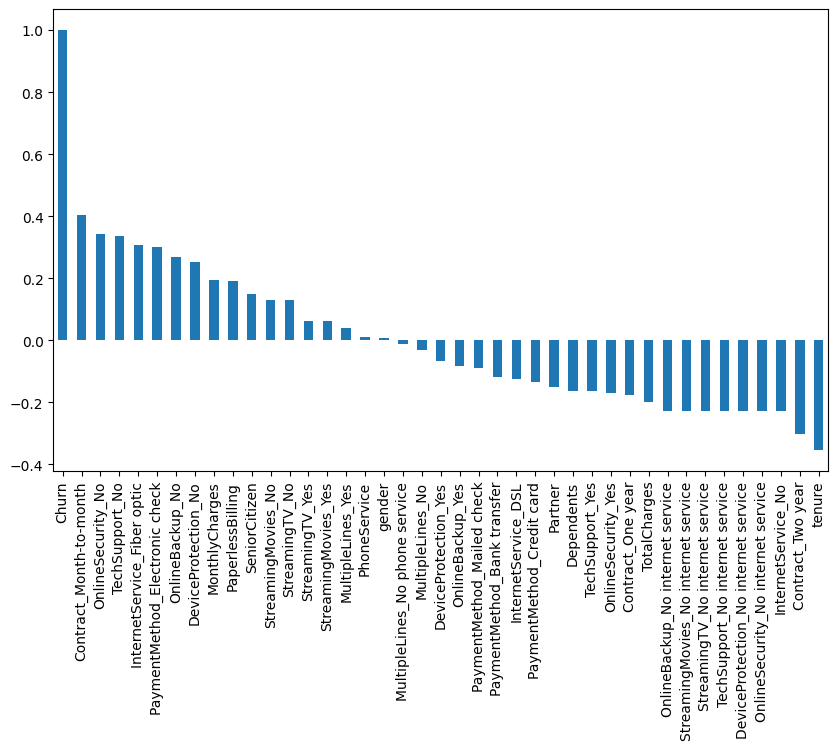

In [30]:
# Import dataset and make a CustomerID column to index
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv",
                        index_col = 'customerID')

#print(df.head())
print()
print(df.shape)

# Check Unique
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

print()
#print(df.info())

# Change TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Delete suffix "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

# Missing values
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

# Check observation of missing values
df[df[features_na[0]].isnull()]

# Drop missing values
df.dropna(inplace=True)

feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

# Female to 1, and Male to 0
df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

# Label One Hot Encoding
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)
#print(df_ohe)

features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

plt.figure(figsize=(10,6))
print(df.columns)
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

plt.savefig("correlation.png", dpi=300)
plt.show()

# Correlation Churn

Correlation between churn and StreamingMovies: 0.06138154801518703
Correlation between churn and InternetService: 0.3168463429310314


<Axes: >

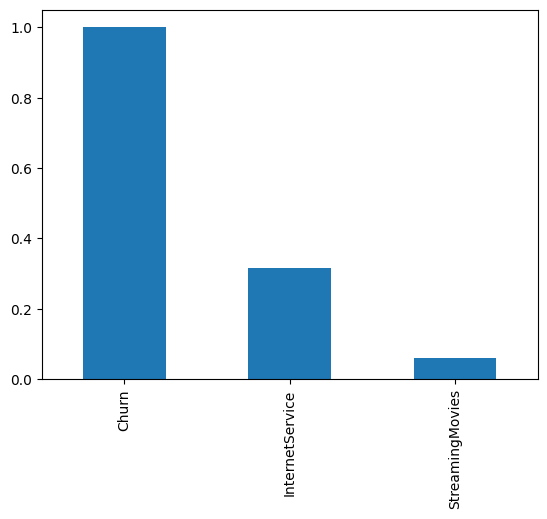

In [34]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert categorical columns (StreamingMovies, InternetService) to numerical for correlation
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

data['StreamingMovies'] = data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service':0})
data['InternetService'] = data['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 0})

# Calculate correlation between churn and StreamingMovies
correlation_streaming = data['Churn'].corr(data['StreamingMovies'])

# Calculate correlation between churn and InternetService
correlation_internet = data['Churn'].corr(data['InternetService'])

# Print the correlation coefficients
print("Correlation between churn and StreamingMovies:", correlation_streaming)
print("Correlation between churn and InternetService:", correlation_internet)

data_correl_pd = data[['Churn','StreamingMovies','InternetService']]
data_correl_pd.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
